### 2nd European Conference on Social Networks, June 14-17, 2016, Paris (http://eusn2016.sciencesconf.org/)
## Workshop 12:
# EXTRACTING SOCIAL NETWORKS FROM LITERARY TEXT
# I. Using Earlier Catalogued Names of Characters
## By Moses Boudourides (<mailto:Moses.Boudourides@gmail.com>) and Sergios Lenis (<mailto:sergioslenis@gmail.com>) 
## University of Patras, Greece

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop](https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

<p>
**Table of Contents**

[I. Importing the Text & Names of Characters](#I)

[II. Descriptive Statistics of Characters](#II)

[III. The Two-Mode Network of Characters and Sentences](#III)

[IV. The Network of Sententially Co-Occurring Characters](#IV)

[V. Trajectories of Transitions among Sentential Co-Occurrences of Characters](#V)

## Importing Python modules 

In [6]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import imp
import seaborn as sns       # pip install seaborn
sns.set_style("white")      # For seaborn to show axes in iPython Notebook
from lightning import Lightning
from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb

# utilsdir='/Users/mosesboudourides/Dropbox/Python Projects/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
# utilsdir='/home/mab/Dropbox/Python Projects/utils/'#tools.py'
utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
%matplotlib inline 
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The case of Anne Bronte's "Agnes Grey"

<a id='I'></a>
## I. Importing the Text & Names of Characters

In [3]:
filename = 'texts/ABronte_AgnesGrey.txt'
titlename = "Anne Bronte's Agnes Grey"
central_hero = 'Nancy Brown'
online_list_of_characters = 'https://en.wikipedia.org/wiki/Agnes_Grey'
nn1 = "Anne Bronte's Agnes Grey selected terms"
nn2 = "Anne Bronte's Agnes Grey Characters"
vname1 = 'vids/AgnesGrey.gif'
vname2 = 'vids/AgnesGrey.mp4'
nn3 = "['Nancy Brown']"
filename1 = 'S_out_graphs/Nancy Brown_graph.graphml'

# https://en.wikipedia.org/wiki/Agnes_Grey

# Agnes Grey 
# Edward Weston 
# Richard Grey 
# Alice Grey
# Mary Grey
# Mrs. Bloomfield
# Mr. Bloomfield 
# Matilda Murray 
# Rosalie Ashby (formerly Rosalie Murray)
# John Murray
# Charles Murray
# Mr. Murray
# Mrs. Murray
# Lord Thomas Ashby
# Mr. Hatfield
# Nancy Brown
# Tom Bloomfield
# Mr. Richardson

dici={'Agnes Grey':'Agnes Grey', 'Agnes':'Agnes Grey',
      'Edward Weston':'Edward Weston','Edward':'Edward Weston','Weston':'Edward Weston',
      'Richard Grey':'Richard Grey','Richard':'Richard Grey',
      'Alice Grey':'Alice Grey','Alice':'Alice Grey',
      'Mary Grey':'Mary Grey','Mary':'Mary Grey',
      'Mrs. Bloomfield':'Mrs. Bloomfield',
      'Mr. Bloomfield':'Mr. Bloomfield',
      'Matilda Murray':'Matilda Murray','Matilda':'Matilda Murray',
      'Rosalie Ashby':'Rosalie Ashby','Rosalie':'Rosalie Ashby',
      'John Murray':'John Murray', 'John':'John Murray',
      'Charles Murray':'Charles Murray','Charles':'Charles Murray',
      'Mr. Murray':'Mr. Murray',
      'Mrs. Murray':'Mrs. Murray',
      'Thomas Ashby':'Lord Thomas Ashby','Thomas':'Lord Thomas Ashby',
      'Mr. Hatfield':'Mr. Hatfield','Hatfield':'Mr. Hatfield',
      'Nancy Brown':'Nancy Brown','Nancy':'Nancy Brown','Brown':'Nancy Brown',
      'Tom Bloomfield':'Tom Bloomfield','Tom':'Tom Bloomfield','Bloomfield':'Tom Bloomfield',
      'Mr. Richardson':'Mr. Richardson','Richardson':'Mr. Richardson'}

In [4]:
f = codecs.open(filename, "r", encoding="utf-8").read()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i and number of characters = %i" %(titlename,num_words,num_chars)

blob = TextBlob(f)

ndici={i.lower():k for i,k in dici.items()}
dnici=[(i.split()[0],i.split()[1]) for i in ndici.keys() if len(i.split())>1]

selectedTerms=ndici.keys()

Anne Bronte's Agnes Grey has number of words = 305043 and number of characters = 378987


In [7]:
%autoreload 2

tool= imp.load_source('tools', utilsdir+'tools.py')
# tool= imp.load_source('tools', '/Users/mosesboudourides/Dropbox/Python Projects/utils/tools.py')
# import tools as tool

create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text
create_coo_graph=tool.create_coo_graph

dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,ndici,titlename)
co_graph=create_coo_graph(coccurlist)

dfst.rename(columns={nn1:nn2},inplace=True)
# dfst.rename(columns={"Anne Bronte's Agnes Grey selected terms":"Anne Bronte's Agnes Grey Characters"},inplace=True)
dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

/home/sergios-len/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Anne Bronte's Agnes Grey Characters,Frequencies
7,Mr. Hatfield,49.0
2,Nancy Brown,42.0
15,Tom Bloomfield,36.0
16,Matilda Murray,35.0
17,Mary Grey,27.0
12,Rosalie Ashby,26.0
6,Mrs. Bloomfield,24.0
9,Agnes Grey,16.0
1,Mrs. Murray,11.0
8,Mr. Bloomfield,11.0


In [9]:
prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 0
# prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>=cuts]
lp = prot_pol_sub['protagonists'].tolist()
lpn = []
for i in lp:
    for j in i:
        lpn.append(j)
# len(set(lpn))
print "The total number of sentences in %s is %i." %(titlename,len(prot_pol_sub))
# print "The total number of sentences in %s with at least %i characters in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'Lists_of_Characters','#_of_protagonists':'#_of_Characters','polarity':'Polarity','subjectivity':'Subjectivity'},inplace=True)
prot_pol_sub.sort(["#_of_Characters"], ascending=[0]) 
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'Sentence_ID'
ddff.head(50)

The total number of sentences in Anne Bronte's Agnes Grey is 2427.


/home/sergios-len/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Lists_of_Characters,#_of_Characters,Polarity,Subjectivity
Sentence_ID,,,,
0,[],0.0,-0.051667,0.418333
1,[],0.0,0.500000,0.666667
2,[],0.0,0.400000,0.350000
3,[],0.0,0.283333,0.511111
4,[],0.0,0.135417,0.616667
5,[],0.0,0.250000,0.250000
6,[],0.0,-0.251389,0.388889
7,[],0.0,0.700000,0.875000
8,[Richard Grey],1.0,0.115341,0.493750


<a id='II'></a>
## II. Descriptive Statistics of Characters

In [10]:
nddd=ddff[ddff['Polarity'] !=0 ]#& ddff['Subjectivity'] !=0]
nddd=nddd[nddd['Subjectivity'] !=0]
# ddff=nddd
ddff[['#_of_Characters','Polarity','Subjectivity']].describe()

,#_of_Characters,Polarity,Subjectivity
count,2427.000000,2427.000000,2427.000000
mean,0.129378,0.072676,0.389228
std,0.368468,0.260786,0.304900
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.425000
75%,0.000000,0.200000,0.600000
max,3.000000,1.000000,1.000000


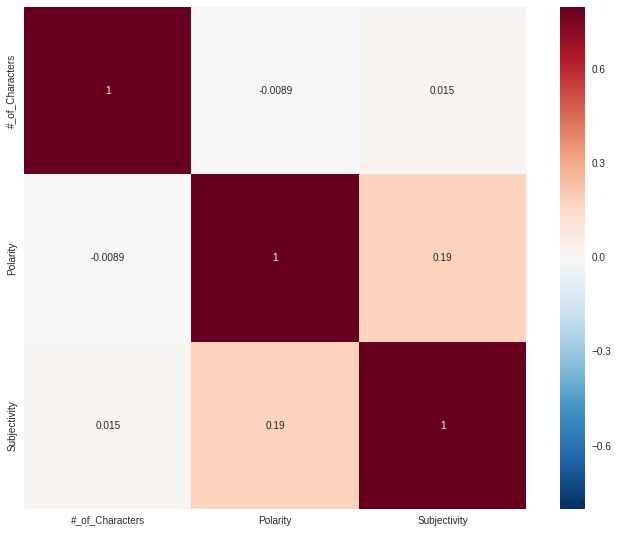

In [11]:
corrmat = ddff.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

/home/sergios-len/.local/lib/python2.7/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


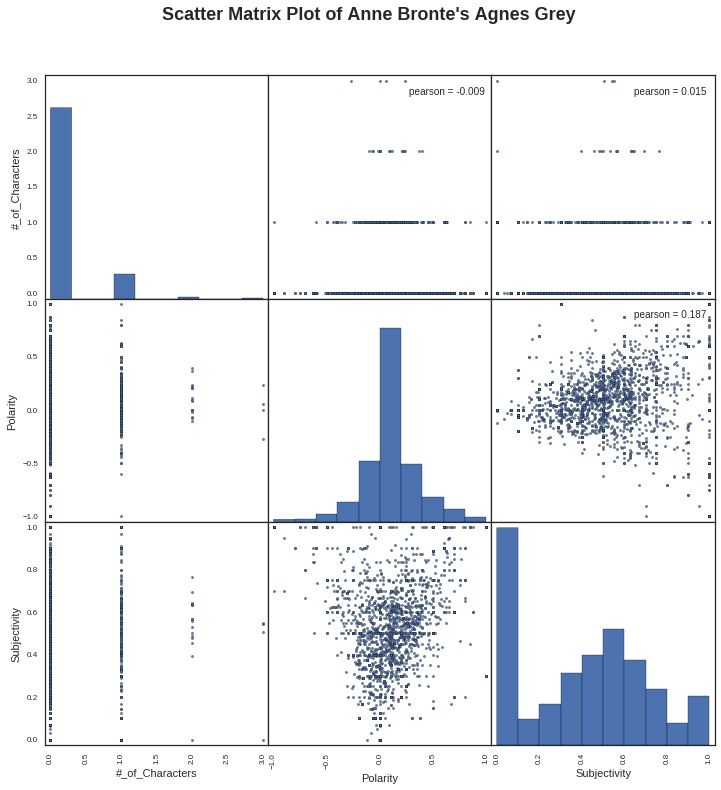

In [12]:
from pandas.tools.plotting import scatter_matrix

ntei='Scatter Matrix Plot of ' + titlename
f, ax = plt.subplots(figsize=(12,12))
# nddd
sss=scatter_matrix(ddff[['#_of_Characters','Polarity','Subjectivity']], alpha=0.9, color='black', diagonal='hist',ax=ax)
plt.suptitle(ntei,fontsize=18,fontweight='bold')
corr = ddff.corr().as_matrix() #nddd.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(sss, k=1)):
    sss[i, j].annotate("pearson = %.3f" %corr[i,j], (0.8, 0.93), xycoords='axes fraction', ha='center', va='center')

### The Histogram of the Number of Characters

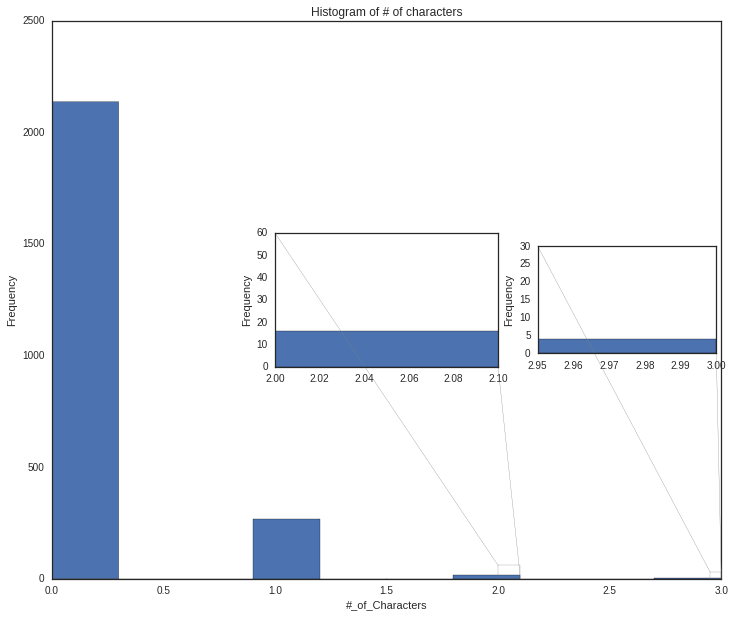

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ndfl=dflines[dflines['#_of_protagonists']>0  ]

fig, ax = plt.subplots(figsize=[12, 10])
axes2 = zoomed_inset_axes(ax, 16, loc=7)  # zoom = 6

dflines['#_of_protagonists'].plot.hist(ax=ax)

ax.set_xlabel('#_of_Characters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # of characters')

x1, x2, y1, y2 = 2.95, 3., 0, 30
axes2.set_xlim(x1, x2)
axes2.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes2)
axes2.set_ylabel('Frequency')

mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
axes3 = zoomed_inset_axes(ax, 10, loc=10)

x1, x2, y1, y2 = 2, 2.1, 0, 60
axes3.set_xlim(x1, x2)
axes3.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes3)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

### Various Scatter Plots

In [14]:
x = nddd['Polarity']
y = nddd['Subjectivity']
z = nddd['#_of_Characters']


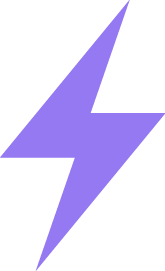

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [16]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [17]:
series = [x,y]
lgn.line(series)

/home/sergios-len/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [18]:
viz = lgn.scatter(x, y, values = z, alpha=0.6, colormap='YlOrRd')
viz

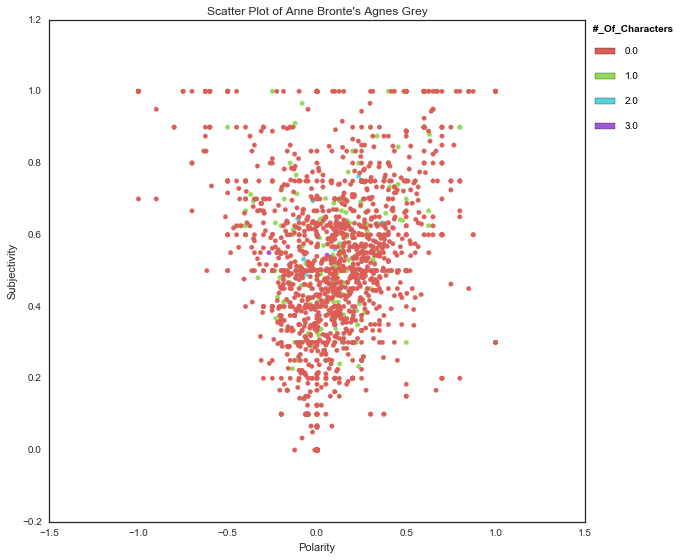

<ggplot: (8773691604333)>

In [14]:
from ggplot import *
import matplotlib as mpl

ntei='Scatter Plot of ' + titlename

p = ggplot(aes(x='Polarity', y='Subjectivity',color='#_of_Characters'), data=ddff) #nddd)
p + geom_point() + ggtitle(ntei) + theme_matplotlib(rc={"figure.figsize": "12, 9"}, matplotlib_defaults=False)

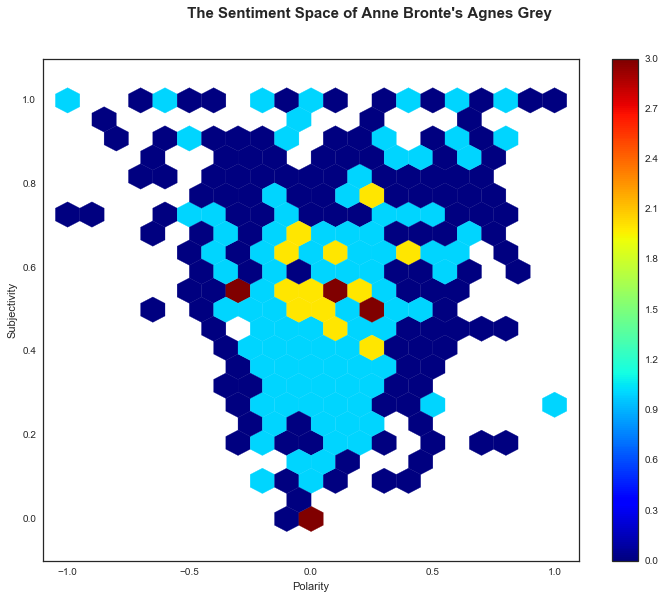

In [15]:
ntei=' The Sentiment Space of ' + titlename
f, ax = plt.subplots(figsize=(12,9))
ddff.plot.hexbin(x='Polarity',y='Subjectivity',gridsize=20,C='#_of_Characters',ax=ax,reduce_C_function=max,cmap='jet')#,title=ntei)
plt.xlim(-1.1, 1.1)
plt.ylim(-.1, 1.1)
plt.suptitle(ntei,fontsize=15,fontweight='bold')

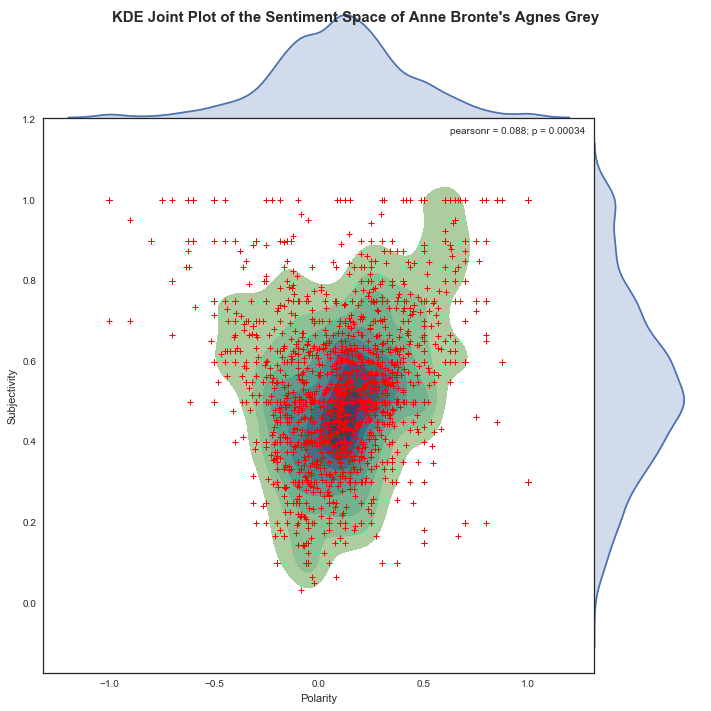

In [16]:
ntei='KDE Joint Plot of the Sentiment Space of ' + titlename
# f, ax = plt.subplots(figsize=(10,10))
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
ggn=sns.jointplot(x='Polarity',y='Subjectivity', data=nddd, kind ="kde",cmap=cmap,space=0, size=10) #, ax=ax) #kind="kde",
# sns.kdeplot(nddd['Polarity'],nddd['Subjectivity'], cmap=cmap, shade=True)
ggn.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
ggn.ax_joint.collections[0].set_alpha(0)
ggn.set_axis_labels("Polarity", "Subjectivity")
plt.suptitle(ntei,fontsize=15,fontweight='bold')

In [17]:
# pols=nddd.Polarity.tolist()
# subj=nddd.Subjectivity.tolist()
# ntei=titlename+' in Sentiment Space'
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# fig, ax = plt.subplots()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-.1, 1.1)
# ax.set_xlabel('Polarity')
# ax.set_ylabel('Subjectivity')   

# # arro=ax.arrow(pols[0], subj[0], pols[1]-pols[0], subj[1]-subj[0], head_width=0.03, head_length=0, fc='b', ec='b',
# #                   length_includes_head=False,
# # # #                  head_starts_at_zero=True
# # # #                  overhang=-.51
# #                  fill=False)

# def animate(i):
#     col=(1.*i/(1.*len(pols)),.5,.5)
#     plt.plot(pols[i],subj[i],'o',color=col, markersize=5)
# #     return arro,

# ani = animation.FuncAnimation(fig, animate, np.arange(0, len(pols)-1), 
#     interval=25, blit=False)

# # ani.save(vname2)#, metadata={'artist':'Guido'})
# ani.save(vname1, writer='imagemagick')
# plt.show()
# print len(pols)

In [18]:
# %%bash
# ffmpeg -f gif -i vids/AgnesGrey.gif vids/AgnesGrey.mp4

In [19]:
import io
import base64
from IPython.display import HTML

video = io.open(vname2, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

# /Users/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/ArthurConanDoyle/SherlockHolmesStoriesNetwork/

<a id='III'></a>
## III. The Two-Mode Network of Characters and Sentences 

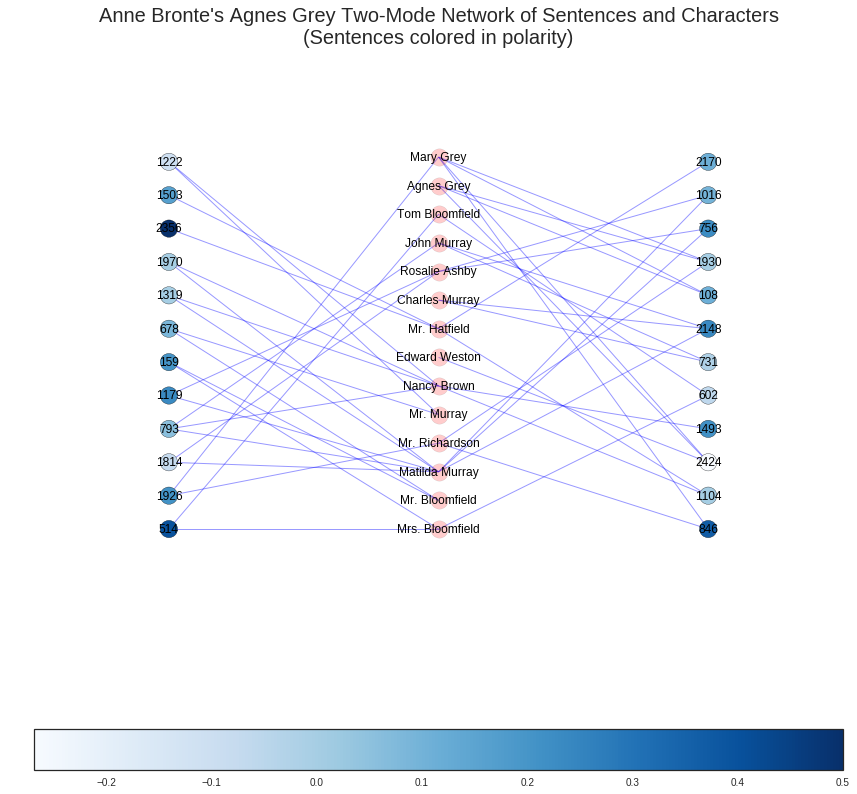

In [20]:
%autoreload 2

# from tools import draw_network_node_color

sstt="%s Two-Mode Network of Sentences and Characters" %titlename
pos=nx.spring_layout(sec_prot)
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]

for en,nd in enumerate(nds):
    if en<len(nds)/2.:
        pos[nd][0]=-1
        pos[nd][1]=en*2./len(nds)
    else:
        pos[nd][0]=1
        pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
for en ,nd in enumerate(prot):
    pos[nd][0]=0
    pos[nd][1]=en*1./len(prot)
possit=tool.draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')
# possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
#                                ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

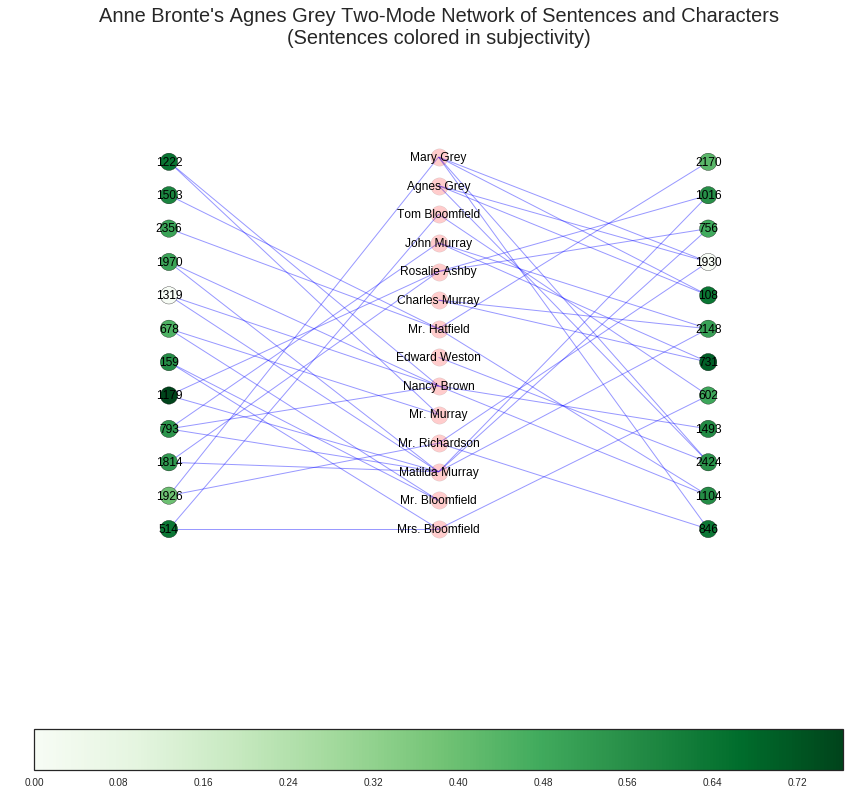

In [21]:
possit=tool.draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')
# possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
#                                ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
#                                node_col='subjectivity',colormat='Greens')

<a id='IV'></a>
## IV. The Network of Sententially Co-Occurring Characters 

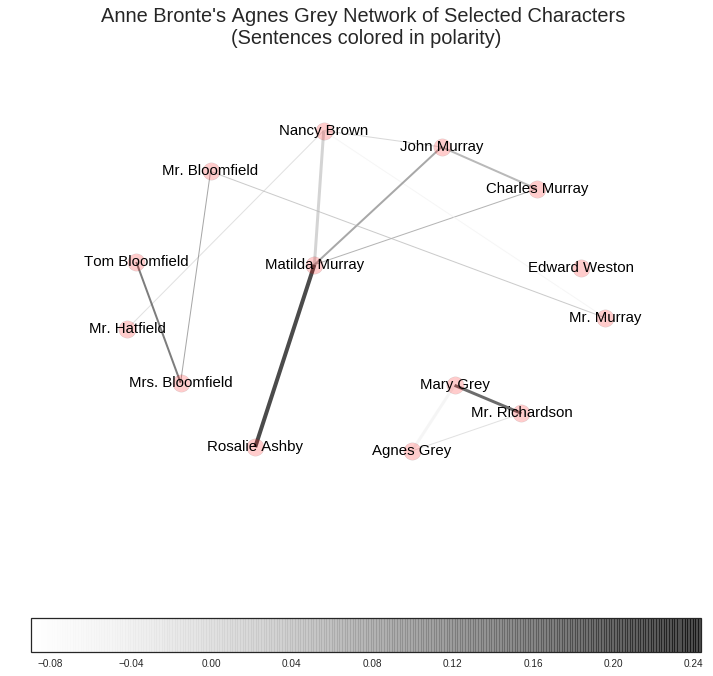

In [22]:
%autoreload 2

# from tools import draw_network, make_graph_from_lists
tool= imp.load_source('tools', utilsdir+'tools.py')

plist = prot_pol_sub['Lists_of_Characters'].tolist()
pplist=prot_pol_sub['Polarity'].tolist()
nplist=prot_pol_sub['#_of_Characters'].tolist()
splist=prot_pol_sub['Subjectivity'].tolist()

G = tool.make_graph_from_lists(plist,pplist,nplist,splist)
posg=nx.spring_layout(G,scale=50,k=0.55,iterations=20)
# posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)

sstt="%s Network of Selected Characters \n(Sentences colored in polarity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='polarity',colormat='Blues')

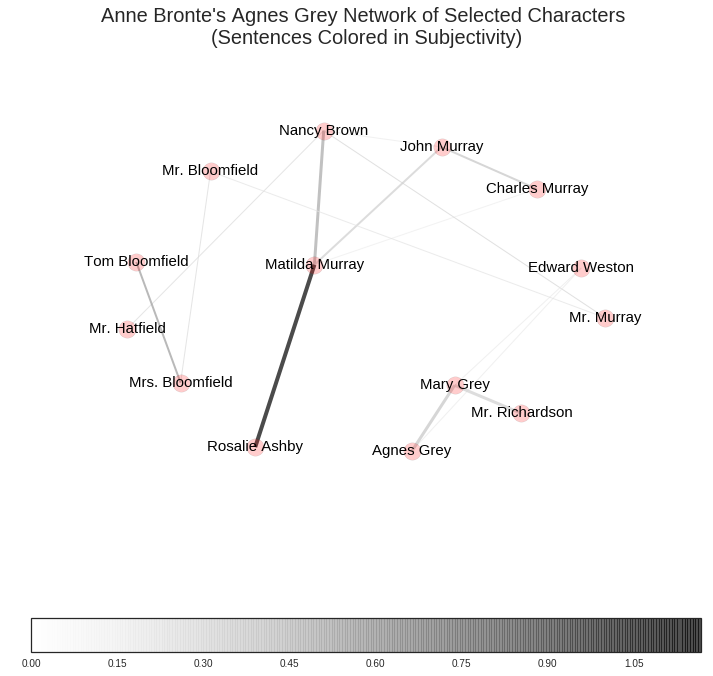

In [23]:
sstt="%s Network of Selected Characters \n(Sentences Colored in Subjectivity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Blues')

### Centralities of Nodes in the Network of Sententially Co-Occurring Characters

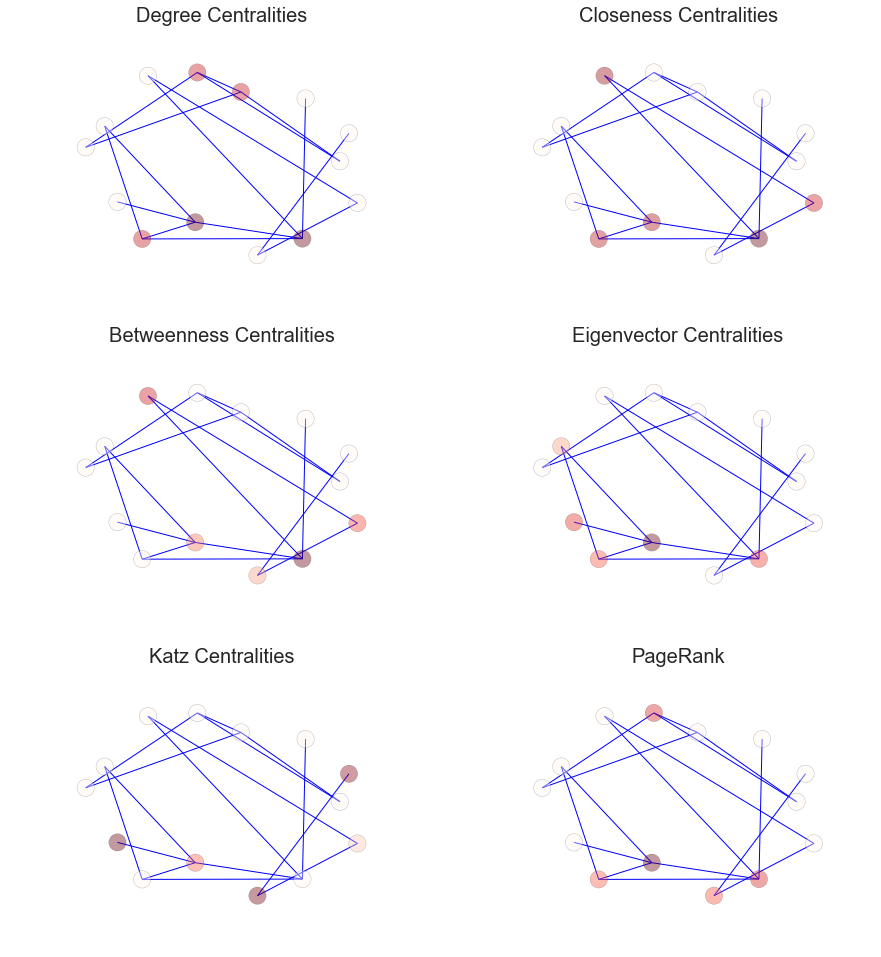

In [24]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Characters 

In [25]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,John Murray,0.296703,-0.349419,0.038462,0.050226,7.614645e-04,0.230769
1,Nancy Brown,0.366516,-0.048720,0.307692,0.104455,2.286526e-03,0.307692
2,Edward Weston,0.173077,-0.035607,0.000000,0.048961,3.663197e-01,0.153846
3,Mr. Hatfield,0.249231,-0.152711,0.000000,0.037079,2.054242e-07,0.076923
4,Charles Murray,0.230769,-0.401956,0.000000,0.025512,4.143894e-01,0.153846
5,Mr. Murray,0.327935,-0.096158,0.230769,0.079165,4.400996e-01,0.153846
6,Tom Bloomfield,0.168399,0.426041,0.000000,0.058022,1.904757e-07,0.076923
7,Mr. Bloomfield,0.270903,0.093010,0.179487,0.055177,9.056515e-08,0.153846
8,Agnes Grey,0.230769,0.056807,0.006410,0.078782,6.900152e-02,0.230769
9,Mr. Richardson,0.173077,0.070271,0.000000,0.063024,2.526975e-07,0.153846


### Communities of Nodes in the Network of Sententially Co-Occurring Characters 

Number of communities of Anne Bronte's Agnes Grey Network of Selected Characters 
(Sentences Colored in Subjectivity) = 3
Community partition of Anne Bronte's Agnes Grey Network of Selected Characters 
(Sentences Colored in Subjectivity):
[['Mrs. Bloomfield', 'Tom Bloomfield', 'Mr. Bloomfield', 'Mr. Murray'], ['Charles Murray', 'Nancy Brown', 'Mr. Hatfield', 'John Murray', 'Rosalie Ashby', 'Matilda Murray'], ['Edward Weston', 'Agnes Grey', 'Mr. Richardson', 'Mary Grey']]
Community modularity of Anne Bronte's Agnes Grey Network of Selected Characters 
(Sentences Colored in Subjectivity) = 0.5670


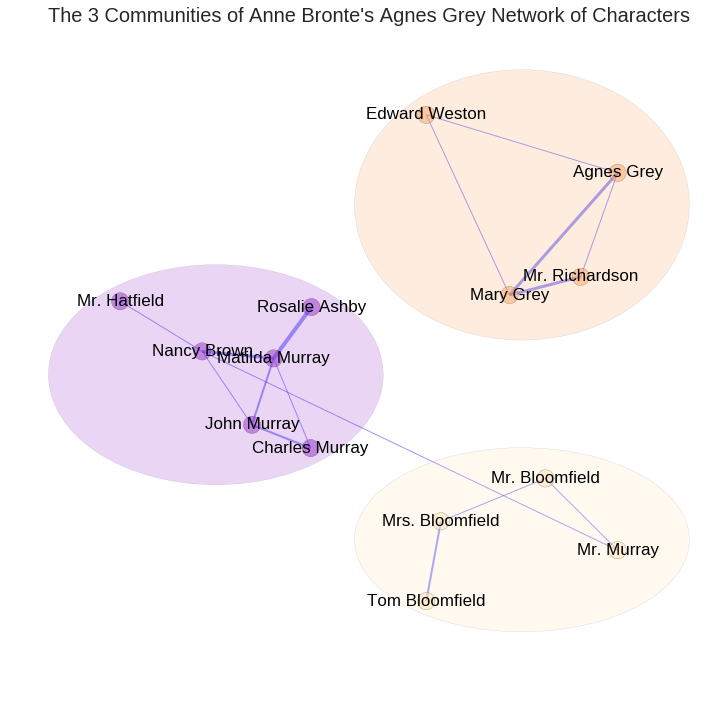

In [24]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(G,sstt)
ndfl=dflines[dflines['#_of_protagonists']>0  ]
# ndfl['#_of_protagonists'].plot.hist()
d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.4
vcc={}
sstta="The %s Communities of %s Network of Characters" %(max(part.values())+1,titlename)#sstt)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

<a id='V'></a>
## V. Trajectories of Transitions among Sentential Co-Occurrences of Characters

### More about Transitions and Trajectories in Temporal Networks:

### http://www.slideshare.net/MosesBoudourides/trajectories1

In [25]:
# %autoreload 2

# !pip install --user pygexf
# !pip install --user pyinterval
# !pip install --user pyinter
# !pip install --user python-igraph
# import trajectories as trj
trj= imp.load_source('trajectories', utilsdir+'trajectories_t.py')

# import create_gexf_year as cgy

### Transitions among Sentential Co-Occurrences of the Central Hero and Other Characters 

['John Murray', 'Mr. Hatfield', 'Matilda Murray', 'Mr. Murray']

Statistics of trajectories of first mode vertices

Mr. Murray [['Nancy Brown__3', 'Nancy Brown__4']]
1 trajectories analyzed.
['Nancy Brown']

Statistics of trajectories of second mode vertices

Nancy Brown [['Matilda Murray__1', 'Matilda Murray__6'], ['John Murray__1', 'Matilda Murray__6']]
1 trajectories analyzed.


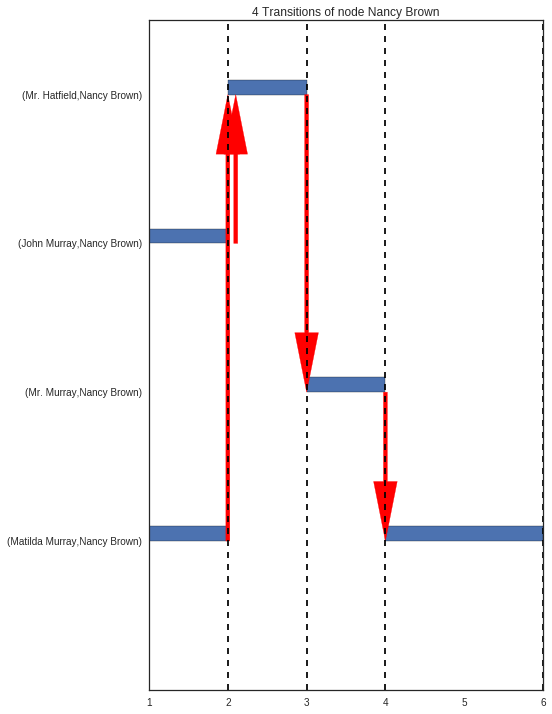

In [26]:
def search_in_list(x):
    l=x['protagonists']
    return central_hero in l
ndfl=dflines[dflines['#_of_protagonists']>1  ]
dialogs=ndfl[ndfl.apply(search_in_list,axis=1) ==True]
protagonists=dialogs.protagonists.tolist()
start=range(1,len(protagonists)+1)
end=range(2,len(protagonists)+2)
polarities=dialogs.polarity.tolist()
subj=dialogs.subjectivity.tolist()
qq=0
figi=None
search_name=central_hero

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bip(start,end,protagonists,search_name,polarities,subj)
trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of the Central Hero and Other Characters 

In [27]:
trajpdfs[nn3]        #["['Agnes Grey']"]
# trajpdfs["['Sherlock Holmes']"]

,Vertices,fOriginator,fTransmitter,fTerminator,fBlackHole,fInvolvement,pOriginator,pTransmitter,pTerminator,pBlackHole,lOriginator,lTransmitter,lTerminator,lBlackHole,lInvolvement,Position,RelPosition,Betweenness
0,John Murray,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,1.0,0.000000,0.0
1,Mr. Hatfield,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,33.333333,4.0
2,Mr. Murray,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,3.0,66.666667,4.0
3,Matilda Murray,1.0,0.0,2.0,1.0,2.0,0.5,0.0,1.0,0.5,4.0,0.0,4.0,14.0,4.0,3.0,66.666667,0.0


### The Trajectory of Transitions among Sentential Co-Occurrences of the Central Hero and Other Characters:

#### Nodes are Co-Occurrences of the Central Hero with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

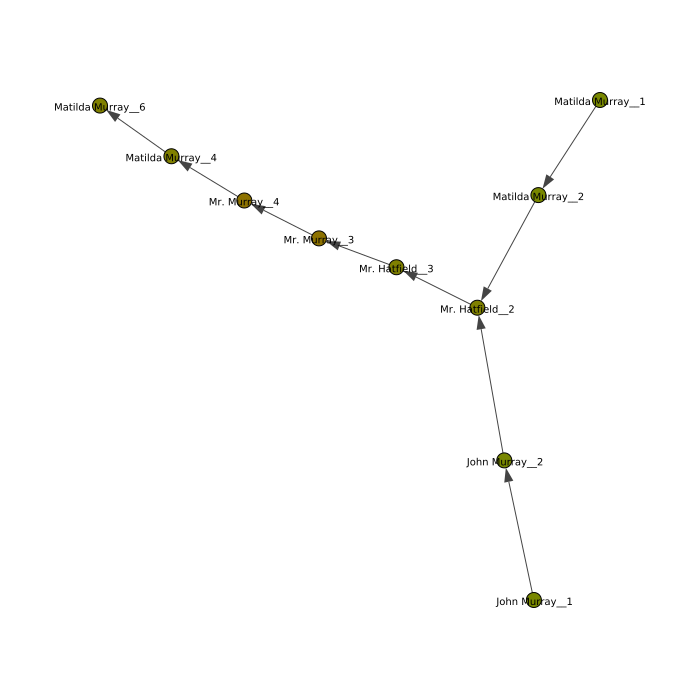

In [29]:
%autoreload 2
import igraph as ig

from tools import igraph_draw_traj
filname=filename1  #'S_out_graphs/Agnes Grey_graph.graphml'
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

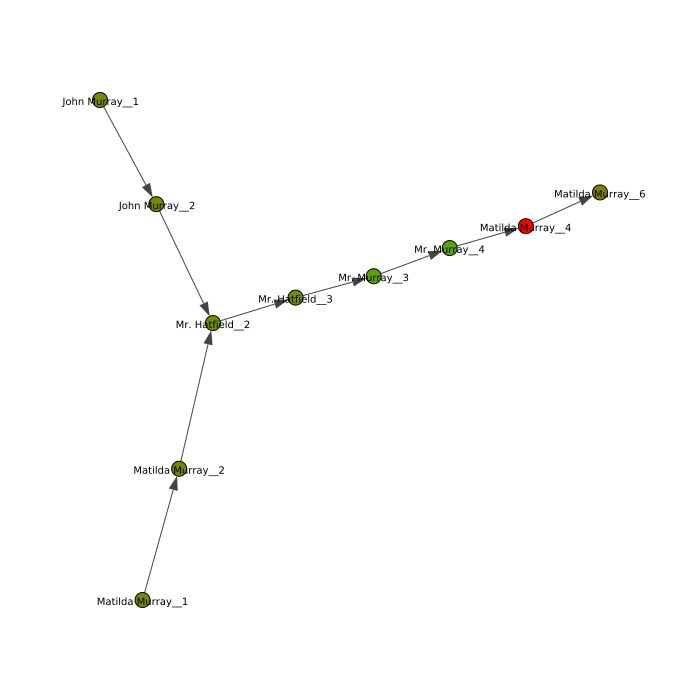

In [31]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)